In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import spacy
from ast import literal_eval
import folium
import re


df = pd.read_csv('LAMX Front Desk (Combined) data.csv')
df

,Date,Name,Location,Total Family Members,Date of Birth,Country of Origin,MPP,Health Problem,Explain Health Problem,Victim of Crime/Violence in Mexico,Explain Crime/Violence,LGBTQ+,Notes,Victim of Crime/Violence
0,3/15/2022,Ilson Deribau,Ciudad Juarez,3.0,5/26/1985,Haiti,No,Si / Yes,Wife is pregnant,No / No,NaN,No,Traveling with pregnant wife and son (5months),No / No
1,3/15/2022,Rolando Flores Gonzalez,Ciudad Juarez,1.0,11/29/1967,Honduras,No,Si / Yes,Problemas con la columna,Si / Yes,Le cortaron un dedo,No,NaN,Si / Yes
2,3/15/2022,Miguerrose Camille,Ciudad Juarez,3.0,6/27/1997,Haiti,No,Si / Yes,Marido tiene presion alta y diabetes.,Si / Yes,Amenazas de golpes,No,Traveling with husband and son (2yrs),Si / Yes
3,3/15/2022,Bryan Steven Suniga,Ciudad Juarez,1.0,1/26/2004,Nicaragua,Si,Si / Yes,Severe headaches.,No / No,NaN,No,"MPP - Tiene fecha de corte en El Paso, Tx. el ...",No / No
4,3/15/2022,Daphka Dlutus,Ciudad Juarez,2.0,12/29/1999,Haiti,No,Si / Yes,Problemas con la columna por un accidente. Tam...,No / No,NaN,No,Traveling with fiance. She is pregnant.,No / No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,8/5/2022,Soraida Jimenez Ponciano,Ciudad Juarez,5.0,10/11/1994,Mexico,No,Si / Yes,Su marido padece de problemas para caminar bie...,Si / Yes,"En Ometepec, Guerrero los del crimen organizad...",No,Viaja con su esposo y sus 3 hijos menores de e...,Si / Yes
7869,8/5/2022,Ada Linda Velasquez Benitez,Ciudad Juarez,2.0,11/2/1997,Honduras,No,No / No,NaN,Si / Yes,"Aqui llegando a la ciudad, el coyote la vendio...",No,Viaja con su hija menor de 4 años de edad. Huy...,Si / Yes
7870,8/5/2022,Susana Alvarado Rodriguez,Ciudad Juarez,3.0,5/9/1993,Mexico,No,No / No,NaN,Si / Yes,"En Cd. Hidalgo, Michoacan sufrio de violencia,...",No,Viaja con sus 2 hijos menores de edad de 13 y ...,Si / Yes
7871,8/5/2022,Phony Vrunache,Ciudad Juarez,3.0,9/22/1976,Haiti,No,Si / Yes,El padece de dolor de estomago. Uno de los sob...,Si / Yes,Llegando a esta ciudad fueron victimas de asal...,No,Viaja con 2 sobrinos varones adultos. Tienen e...,Si / Yes


In [2]:
df["Victim of Crime/Violence in Mexico"].value_counts()

Victim of Crime/Violence in Mexico
Si / Yes                   5558
No / No                    2184
No lo sé / I don't know      64
Name: count, dtype: int64

In [3]:
replacement_statement = {"No lo sé / I don't know" : None,
"No / No" : False,
"Si / Yes" : True}
df["Victim of Crime/Violence in Mexico"] = df["Victim of Crime/Violence in Mexico"].replace(replacement_statement)
non_none_count = df['Victim of Crime/Violence in Mexico'].count()
number_of_trues = df['Victim of Crime/Violence in Mexico'].sum()

print(f"Percentage of Migrant Parties that have been victims to a Crime/Violence in Mexico: \033[1m{(number_of_trues/non_none_count):.2%} \033[0m")


Percentage of Migrant Parties that have been victims to a Crime/Violence in Mexico: 71.79% 


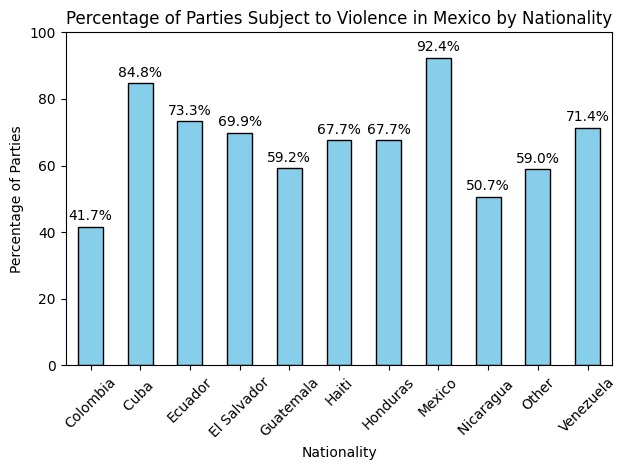

In [4]:
add_df = df
add_df["Country of Origin"] = df["Country of Origin"].replace("Brazil", None)
percentage_of_violence = add_df.groupby('Country of Origin')['Victim of Crime/Violence in Mexico'].mean() * 100

# Plot the bar graph
ax = percentage_of_violence.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Parties Subject to Violence in Mexico by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Percentage of Parties')
plt.xticks(rotation=45)
plt.ylim(0, 100)

for i, v in enumerate(percentage_of_violence):
    if v == 100:
        continue
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')


# Show the plot
plt.tight_layout()
plt.savefig("Violence in Mexico by Nationality.png")
plt.show()


In [5]:
import os
files = [pd.read_csv(os.path.join(os.getcwd(), filename)) for filename in os.listdir(os.getcwd()) if filename.endswith('.csv') and "(Combined)" not in filename]

df = pd.concat(files, axis=0, ignore_index=True)
df = df.drop_duplicates()



In [6]:
df.columns

Index(['Fecha de Llamada', 'Cual es su nombre?', 'Scheduled', 'Location',
       'Fecha de Nacimiento', '¿Cual es tu país de origen?',
       '¿Cuántas personas en total están viajando?',
       '¿Cuál es el mejor número de teléfono para contactarlo?',
       '¿Cuál es el país de origen de esta persona?', 'MPP',
       ...
       '¿Esta persona y su familia han sido víctimas de algún crimen o violencia en México? copy',
       '¿Esta persona se identifica como miembro de la comunidad LGBTQ+?',
       'End Script Other', 'Route Call to Linda Corchado',
       'Route Call to Linda Corchado Other', 'First Name', 'Last Name',
       'Added to sharepoint', 'Zero Tolerance', 'No future registration'],
      dtype='object', length=118)

In [7]:
df['Location'].value_counts()

Location
Ciudad Juarez     5696
Otro Lugar          14
Puerto Palomas      11
Name: count, dtype: int64

In [8]:
df['MPP'].value_counts()

MPP
No        6913
No se       62
Si          48
Name: count, dtype: int64

In [9]:
df['Expulsado bajo T42'].value_counts()

Expulsado bajo T42
No       2277
Si        273
No se      20
Name: count, dtype: int64

In [10]:
df['Prior Deportation'].value_counts()

Prior Deportation
No       118
Si        11
No se      6
Name: count, dtype: int64

In [11]:
df['Prior Removal'].value_counts()

Prior Removal
No       275
Si         8
No se      6
Name: count, dtype: int64

In [12]:
df['Albergue? '].value_counts()

Albergue? 
No    1772
Si    1635
Name: count, dtype: int64

In [13]:
filtered_df = df[df['Albergue? '] == "No"]

filtered_df['Nombre de Albergue'].sample(100)

6683    NaN
6923    NaN
5872    NaN
2878    NaN
5959    NaN
       ... 
7676    NaN
6090    NaN
2731    NaN
2993    NaN
7349    NaN
Name: Nombre de Albergue, Length: 100, dtype: object

In [14]:
df['¿El acto de violencia ocurrió en Ciudad Juarez?'].value_counts()


¿El acto de violencia ocurrió en Ciudad Juarez?
Si                       601
No                       424
I don't know/remember      4
Name: count, dtype: int64

In [15]:
df.dropna(thresh=1000, axis=1).columns

Index(['Fecha de Llamada', 'Cual es su nombre?', 'Scheduled', 'Location',
       'Fecha de Nacimiento', '¿Cual es tu país de origen?',
       '¿Cuántas personas en total están viajando?',
       '¿Cuál es el mejor número de teléfono para contactarlo?', 'MPP',
       '¿Tiene algún problema de salud o discapacidad grave?',
       'Explique brevemente el problema de salud grave o discapacidad:',
       '¿Ha sido víctima de algún crimen o violencia en México?',
       'Explique el crimen o violencia en Mexico:', 'En Ciudad Juarez?',
       '¿Se identifica como miembro de la comunidad LGBTQ+?', 'Notes',
       '¿Para quién busca asistencia legal?', 'In Juarez', '¿Usa WhatsApp?',
       '¿Cuándo ocurrió el acto de violencia?',
       '¿El acto de violencia ocurrió en Ciudad Juarez?', 'Albergue? ',
       'Nombre de Albergue', 'Expulsado bajo T42', 'Intro',
       '¿Cuál es el código de país del número de teléfono de Whatsapp?',
       'End Script'],
      dtype='object')

In [16]:
df['En Ciudad Juarez?'].value_counts()

En Ciudad Juarez?
No / No                 1804
Si / Yes                1784
No se / I don't know      11
Name: count, dtype: int64

In [17]:
df['In Juarez'].value_counts()

In Juarez
Si / Yes    1820
No / No       43
Name: count, dtype: int64

In [18]:
df['En Ciudad Juarez?'].isna()

0        True
1       False
2       False
3        True
4        True
        ...  
7868    False
7869    False
7870    False
7871    False
7872     True
Name: En Ciudad Juarez?, Length: 7850, dtype: bool

In [19]:
(df['Explique el crimen o violencia en Mexico:'] + df['En Ciudad Juarez?']).dropna().sample(5)

5543    En Tapachula, Chiapas le robaron sus pertenenc...
6771    Were assaulted and robbed on way to Cd JuarezN...
2515    En Cinzalapa de Figueroa, Chiapas ella fue ame...
4365             She was kidnapped, and was rapedNo / No 
2618    Su esposa fue violada por la noche, yendo a la...
dtype: object

In [20]:
df_clean = df[['En Ciudad Juarez?','¿El acto de violencia ocurrió en Ciudad Juarez?']]
df_clean = df_clean.dropna(how='all')
df_clean

,En Ciudad Juarez?,¿El acto de violencia ocurrió en Ciudad Juarez?
1,No / No,NaN
2,Si / Yes,NaN
5,No / No,NaN
7,No / No,NaN
8,No / No,NaN
...,...,...
7866,Si / Yes,NaN
7868,No / No,NaN
7869,Si / Yes,NaN
7870,No / No,NaN


In [34]:
def simplify_violence(row):
    answer1,answer2 = row["En Ciudad Juarez?"], row["¿El acto de violencia ocurrió en Ciudad Juarez?"] 
    if answer1 == "Si / Yes" or answer2 == 'Si':
        return "Yes"
    if answer1 == "No se / I don't know" or answer2 == "I don't know/remember":
        return None
    else:
        return "No"


df_clean['Did You Face Violence in Juarez?'] = df_clean.apply(simplify_violence, axis=1)
df_clean[df_clean['¿El acto de violencia ocurrió en Ciudad Juarez?'] == "Si"].sample(10)
df_clean[df_clean['Did You Face Violence in Juarez?'] == 'Yes'].sample(10)

,En Ciudad Juarez?,¿El acto de violencia ocurrió en Ciudad Juarez?,Did You Face Violence in Juarez?
1433,NaN,Si,Yes
3273,Si / Yes,NaN,Yes
2515,Si / Yes,NaN,Yes
1405,NaN,Si,Yes
999,Si / Yes,NaN,Yes
5989,Si / Yes,NaN,Yes
6616,Si / Yes,NaN,Yes
43,Si / Yes,NaN,Yes
2380,Si / Yes,NaN,Yes
6720,Si / Yes,NaN,Yes


In [35]:
df_clean['Did You Face Violence in Juarez?'].value_counts()

Did You Face Violence in Juarez?
Yes    2385
No     2228
Name: count, dtype: int64

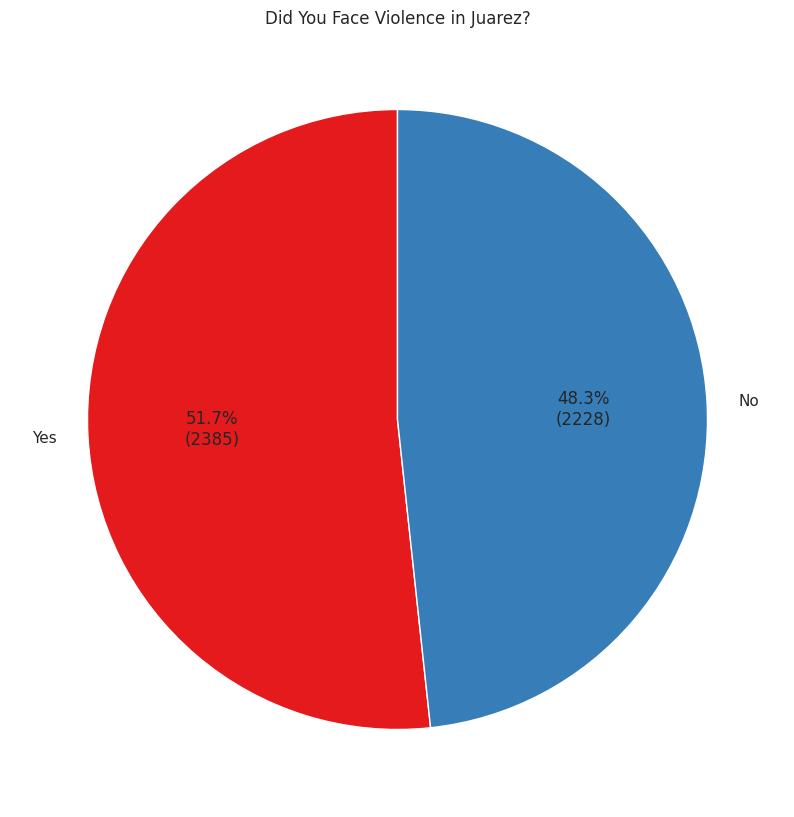

In [53]:
counts = df_clean['Did You Face Violence in Juarez?'].value_counts()
# Create a pie chart using matplotlib.pyplot
plt.figure(figsize=(10, 12))


def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.pie(counts, labels=counts.index, autopct=autopct_format(counts), startangle=90, colors=plt.cm.Set1.colors)

# Customize the plot using Seaborn style
sns.set(style="whitegrid")
plt.title('Did You Face Violence in Juarez?')

plt.savefig("Did You Face Violence in Juarez?.png", bbox_inches='tight')


# Show the plot
plt.show()